# NuSVC SVC and LinearSVC for Classifying Music Emotions
---
## About the Dataset

For this experiment, our dataset contains 267 music samples that were labelled by 2 music experts and 151 samples labeled in the semi-supervised learning task. The dataset has a combination of high level and low level features. The high level features are tempo, arousal, and scale, which were all labelled by the music experts. The low level features were extracted from the music samples using the JAudio software.

---
## Libraries

We used the pandas and csv libraries to load the dataset, which is a csv file. Then we used numpy to manipulate the loaded dataset. We used the sci kit learn library for the Nu Support Vector Classifier, Support Vector Classifier, and Linear Support Vector Classifier algorithms. The XLB file is where we modularized the training and validation process

In [1]:
# dependencies
import csv
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn import svm
import numpy as np
from scipy.stats import uniform, norm
from sklearn.metrics import plot_confusion_matrix
from imblearn.over_sampling import SMOTE, RandomOverSampler
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_selection import SelectFromModel, SelectKBest, VarianceThreshold, chi2, f_classif, mutual_info_classif
from XLB import *

import warnings
warnings.filterwarnings('ignore')

Here we load the data from the csv file and preprocess it by removing the header row and the filename column this is done by the extract_data function from the XLB file which takes the filename of the dataset as a parameter

---

After the initial preprocessing step, we separated the music features and the labelled emotion into the x_train and y_train arrays respectively. We also used the scikit learn min max scaler to normalize the dataset.

In [7]:
# extract data from files
x_train, y_train = extract_data("FinalTrainingSet.csv")
x_val, y_val = extract_data("Validation Set.csv")

# scale data values
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_val = scaler.transform(x_val)

# feature selection
num_features = 45
feat_sel = VarianceThreshold()
x_train = feat_sel.fit_transform(x_train)
# WINNER : 47.62% 0.43
feat_sel_2 = SelectFromModel(estimator=DecisionTreeClassifier(random_state=481516234))
# feat_sel_2 = SelectFromModel(\
#                 estimator=RandomForestClassifier(n_estimators=100,\
#                                              random_state=481516234))
# feat_sel_2 = SelectFromModel(\
#                 estimator=LogisticRegression(random_state=481516234))
# feat_sel_2 = SelectFromModel(\
#                 estimator=svm.LinearSVC(C=0.01, penalty="l1", dual=False,\
#                                     random_state=481516234))
# feat_sel_2 = SelectKBest(mutual_info_classif,k=num_features)
x_train = feat_sel_2.fit_transform(x_train,y_train)
x_val = feat_sel_2.transform(feat_sel.transform(x_val))
# print("After Variance Threshold Feature Selection:",x_train.shape)

rand_seed = 3454132

oversampler = SMOTE(sampling_strategy="not majority",random_state=rand_seed)
x_smote, y_smote = oversampler.fit_resample(x_train,y_train)
print(x_smote.shape,y_smote.shape)

oversampler = RandomOverSampler(sampling_strategy="not majority",\
                                random_state=rand_seed)
x_os, y_os = oversampler.fit_resample(x_train,y_train)
print(x_os.shape,y_os.shape)

(750, 61) (750,)
(750, 61) (750,)


The following cells are the experiments we ran with the default dataset, oversampled version, and SMOTE version using random search as the hyperparameter search algorithm

---
This cell instantiates the NuSVC object and the hyperparameter search object.

In [8]:
# NuSVC, Randomized Search
k_folds = 5
random_search_iterations = 1000
rand_seed = 3249807

parameters = {
    'nu' : uniform(loc=0.0,scale=0.1),
    'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
    'shrinking' : [True,False],
    'probability' : [True,False],
    'max_iter' : [1000,2000],
    'break_ties' : [True,False]
}

nusvc = svm.NuSVC(random_state=rand_seed)
random_search_nu = RandomizedSearchCV(nusvc, parameters,\
                                          random_state=rand_seed,\
                                          n_iter=random_search_iterations,\
                                          cv=k_folds,n_jobs=-1)

The following cells are where the NuSVC model is trained using the imbalanced, oversampled, and SMOTE. They are then validated using the validation set

Best Score: 0.3291
break_ties => False
kernel => rbf
max_iter => 2000
nu => 0.042767793481332056
probability => True
shrinking => True
Splits: 5
Vanilla Train Accuracy: 99.7506%
Vanilla Validation Accuracy: 47.62%
Vanilla F1-score: 0.43


(47.61904761904761, 0.4252136752136752)

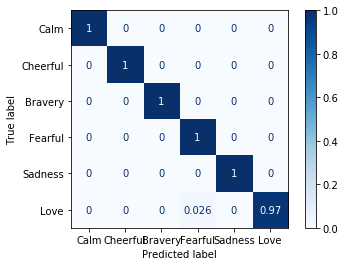

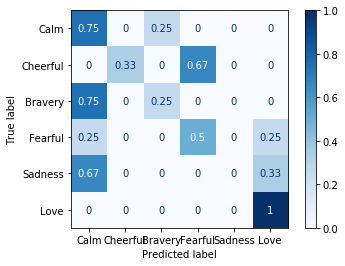

In [9]:
print_res("Vanilla",x_train,y_train,random_search_nu)
test_res("Vanilla",x_val,y_val,random_search_nu)

Best Score: 0.7867
break_ties => False
kernel => rbf
max_iter => 1000
nu => 0.018390283456564762
probability => True
shrinking => False
Splits: 5
Random Oversampling Train Accuracy: 99.8667%
Random Oversampling Validation Accuracy: 47.62%
Random Oversampling F1-score: 0.42


(47.61904761904761, 0.4219576719576719)

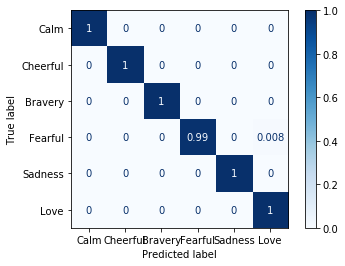

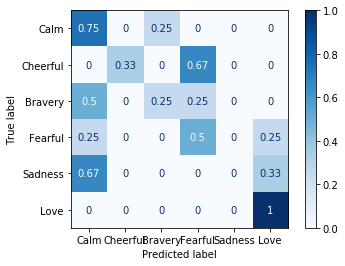

In [10]:
print_res("Random Oversampling",x_os,y_os,random_search_nu)
test_res("Random Oversampling",x_val,y_val,random_search_nu)

Best Score: 0.7747
break_ties => False
kernel => rbf
max_iter => 2000
nu => 0.012995073708406635
probability => False
shrinking => True
Splits: 5
SMOTE Train Accuracy: 99.8667%
SMOTE Validation Accuracy: 47.62%
SMOTE F1-score: 0.42


(47.61904761904761, 0.4219576719576719)

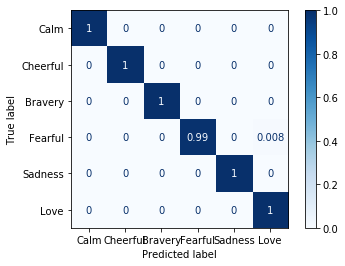

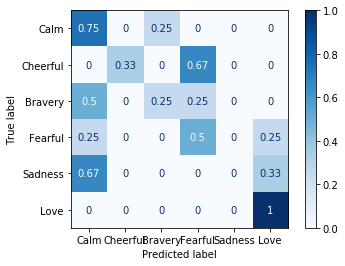

In [11]:
print_res("SMOTE",x_smote,y_smote,random_search_nu)
test_res("SMOTE",x_val,y_val,random_search_nu)

This cell instantiates the SVC object and the hyperparameter search object.

In [7]:
# extract data from files
x_train, y_train = extract_data("FinalTrainingSet.csv")
x_val, y_val = extract_data("Validation Set.csv")

# scale data values
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_val = scaler.transform(x_val)

# feature selection
num_features = 45
feat_sel = VarianceThreshold()
x_train = feat_sel.fit_transform(x_train)
# WINNER : 42.86% 0.34
feat_sel_2 = SelectFromModel(estimator=DecisionTreeClassifier(random_state=481516234))
# feat_sel_2 = SelectFromModel(\
#                 estimator=RandomForestClassifier(n_estimators=100,\
#                                              random_state=481516234))
# feat_sel_2 = SelectFromModel(\
#                 estimator=LogisticRegression(random_state=481516234))
# feat_sel_2 = SelectFromModel(\
#                 estimator=svm.LinearSVC(C=0.01, penalty="l1", dual=False,\
#                                     random_state=481516234))
# feat_sel_2 = SelectKBest(mutual_info_classif,k=num_features)
x_train = feat_sel_2.fit_transform(x_train,y_train)
x_val = feat_sel_2.transform(feat_sel.transform(x_val))
# print("After Variance Threshold Feature Selection:",x_train.shape)

rand_seed = 3454132

oversampler = SMOTE(sampling_strategy="not majority",random_state=rand_seed)
x_smote, y_smote = oversampler.fit_resample(x_train,y_train)
print(x_smote.shape,y_smote.shape)

oversampler = RandomOverSampler(sampling_strategy="not majority",\
                                random_state=rand_seed)
x_os, y_os = oversampler.fit_resample(x_train,y_train)
print(x_os.shape,y_os.shape)

(750, 61) (750,)
(750, 61) (750,)


In [8]:
# SVM, Grid Search
k_folds = 5
random_search_iterations = 1000
rand_seed = 3249807

parameters = {
    'C': np.logspace(-10,1,1000), 
    'gamma': ['scale', 'auto'], 
    'kernel':['linear', 'rbf', 'sigmoid', 'poly'], 
    'shrinking':[True, False], 
    'probability':[True, False],
    'max_iter' : [1000],
    'break_ties' : [True, False]
}

svmc = svm.SVC(random_state=rand_seed)
random_search_svm = RandomizedSearchCV(svmc, parameters,\
                                       random_state=rand_seed,\
                                       n_iter=random_search_iterations,\
                                       cv=k_folds,n_jobs=-1)

The following cells are where the SVC model is trained using the imbalanced, oversampled, and SMOTE. They are then validated using the validation set

Best Score: 0.3391
shrinking => True
probability => True
max_iter => 1000
kernel => poly
gamma => scale
break_ties => False
C => 0.160400310705682
Splits: 5
Vanilla Train Accuracy: 54.8628%
Vanilla Validation Accuracy: 19.05%
Vanilla F1-score: 0.10


(19.047619047619047, 0.10247841826789197)

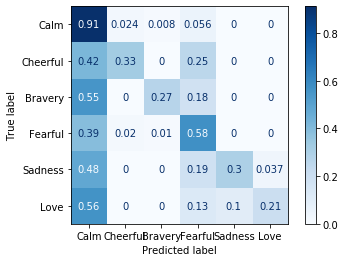

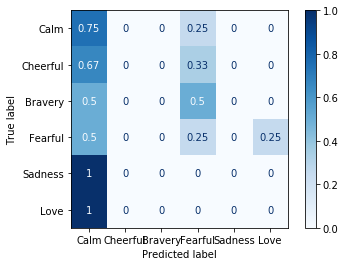

In [9]:
print_res("Vanilla",x_train,y_train,random_search_svm)
test_res("Vanilla",x_val,y_val,random_search_svm)

Best Score: 0.7760
shrinking => True
probability => True
max_iter => 1000
kernel => poly
gamma => scale
break_ties => False
C => 5.724766239702166
Splits: 5
Random Oversampling Train Accuracy: 98.4000%
Random Oversampling Validation Accuracy: 42.86%
Random Oversampling F1-score: 0.34


(42.857142857142854, 0.3388167388167388)

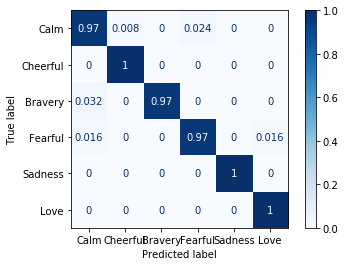

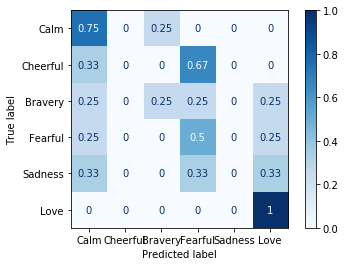

In [10]:
print_res("Random Oversampling",x_os,y_os,random_search_svm)
test_res("Random Oversampling",x_val,y_val,random_search_svm)

Best Score: 0.7547
shrinking => True
probability => True
max_iter => 1000
kernel => poly
gamma => scale
break_ties => True
C => 7.192118872221178
Splits: 5
SMOTE Train Accuracy: 99.0667%
SMOTE Validation Accuracy: 42.86%
SMOTE F1-score: 0.34


(42.857142857142854, 0.34227994227994224)

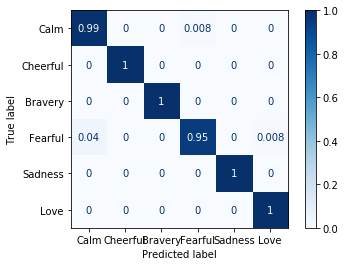

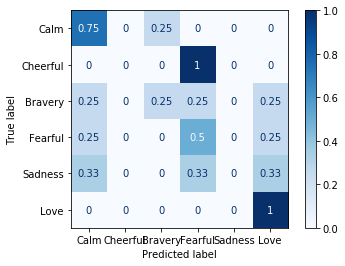

In [11]:
print_res("SMOTE",x_smote,y_smote,random_search_svm)
test_res("SMOTE",x_val,y_val,random_search_svm)

This cell instantiates the LinearSVC object and the hyperparameter search object.

In [2]:
## extract data from files
x_train, y_train = extract_data("FinalTrainingSet.csv")
x_val, y_val = extract_data("Validation Set.csv")

# scale data values
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_val = scaler.transform(x_val)

# feature selection
num_features = 45
feat_sel = VarianceThreshold()
x_train = feat_sel.fit_transform(x_train)
# feat_sel_2 = SelectFromModel(estimator=DecisionTreeClassifier(random_state=481516234))
# feat_sel_2 = SelectFromModel(\
#                 estimator=RandomForestClassifier(n_estimators=100,\
#                                              random_state=481516234))
# feat_sel_2 = SelectFromModel(\
#                 estimator=LogisticRegression(random_state=481516234))
# feat_sel_2 = SelectFromModel(\
#                 estimator=svm.LinearSVC(C=0.01, penalty="l1", dual=False,\
#                                     random_state=481516234))
# 28.57% 0.28
feat_sel_2 = SelectKBest(chi2,k=num_features)
x_train = feat_sel_2.fit_transform(x_train,y_train)
x_val = feat_sel_2.transform(feat_sel.transform(x_val))
# print("After Variance Threshold Feature Selection:",x_train.shape)

rand_seed = 3454132

oversampler = SMOTE(sampling_strategy="not majority",random_state=rand_seed)
x_smote, y_smote = oversampler.fit_resample(x_train,y_train)
print(x_smote.shape,y_smote.shape)

oversampler = RandomOverSampler(sampling_strategy="not majority",\
                                random_state=rand_seed)
x_os, y_os = oversampler.fit_resample(x_train,y_train)
print(x_os.shape,y_os.shape)

(750, 45) (750,)
(750, 45) (750,)


In [3]:
# LinearSVM, Randomized Search
k_folds = 5
random_search_iterations = 500
rand_seed = 3249807

parameters = {
    'penalty':['l1', 'l2'],
    'loss':['hinge', 'squared_hinge'], 
    'dual':[True, False], 
    'C': np.logspace(-10,1,1000), 
    'multi_class':['ovr', 'crammer_singer'], 
    'fit_intercept' : [True,False],
    'max_iter':[1000]
}

linearsvm = svm.LinearSVC(random_state=rand_seed)
random_search_linear = RandomizedSearchCV(linearsvm, parameters,\
                                          random_state=rand_seed,\
                                          n_iter=random_search_iterations,\
                                          cv=k_folds,n_jobs=-1)

The following cells are where the LinearSVC model is trained using the imbalanced, oversampled, and SMOTE. They are then validated using the validation set

Best Score: 0.3541
penalty => l2
multi_class => ovr
max_iter => 1000
loss => squared_hinge
fit_intercept => False
dual => True
C => 0.0053669769455404765
Splits: 5
Vanilla Train Accuracy: 37.6559%
Vanilla Validation Accuracy: 19.05%
Vanilla F1-score: 0.10


(19.047619047619047, 0.09824561403508773)

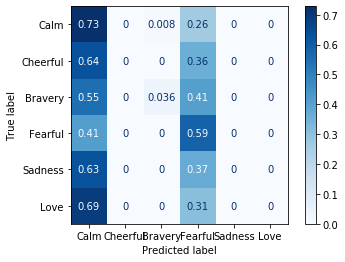

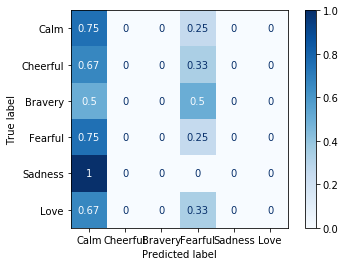

In [4]:
print_res("Vanilla",x_train,y_train,random_search_linear)
test_res("Vanilla",x_val,y_val,random_search_linear)

Best Score: 0.4107
penalty => l2
multi_class => crammer_singer
max_iter => 1000
loss => hinge
fit_intercept => True
dual => False
C => 9.50556592010121
Splits: 5
Random Oversampling Train Accuracy: 48.6667%
Random Oversampling Validation Accuracy: 9.52%
Random Oversampling F1-score: 0.09


(9.523809523809524, 0.08571428571428572)

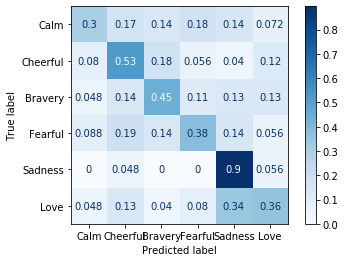

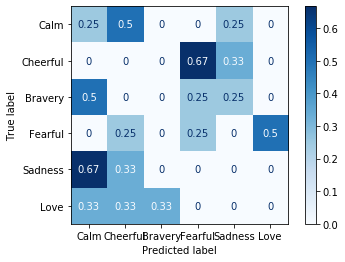

In [5]:
print_res("Random Oversampling",x_os,y_os,random_search_linear)
test_res("Random Oversampling",x_val,y_val,random_search_linear)

Best Score: 0.4227
penalty => l1
multi_class => ovr
max_iter => 1000
loss => squared_hinge
fit_intercept => True
dual => False
C => 9.267593301146864
Splits: 5
SMOTE Train Accuracy: 50.1333%
SMOTE Validation Accuracy: 28.57%
SMOTE F1-score: 0.28


(28.57142857142857, 0.27664399092970526)

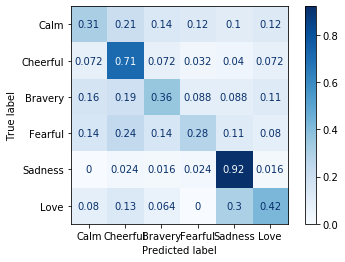

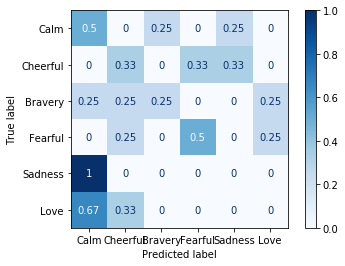

In [6]:
print_res("SMOTE",x_smote,y_smote,random_search_linear)
test_res("SMOTE",x_val,y_val,random_search_linear)